In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
import global_values
from groups import *
from merge_groups_best_candidate import *
from puzzle import *
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
global_values.MODEL = SiameseCNN()
global_values.MODEL.load_state_dict(torch.load("siamese_weights.pth", map_location=device))
global_values.MODEL.to(device)
global_values.MODEL.eval()
global_values.DEVICE = device
NN_SCORING = True
ROTATING_PIECES = True



def clasic_score_one_image_passing(side_comparison, th = global_values.IMAGE_TH):
    if side_comparison.score < th:
        return True
    return False

def prudent_x_buddy_one_image_passing(side_comparison, th = global_values.PRUDENT_X_BUDDY_TH_IMAGE):
    if side_comparison.prudent_score * side_comparison.buddy_score < th:
        return True
    return False

## mai indicat pt astea mai mari
def safe_clasic_score_one_image_passing(side_comparison, th = 0.015):
    if side_comparison.score < th:
        return True
    return False

def mean_clasic_score(mean, th = global_values.GROUP_TH):
    if mean < th:
        return True
    return False

def no_mean_score(mean, th = 0):
    return True


In [2]:
image = "0006.png"
image_path = os.path.join("all_images",image)

output_folder = "fragments"

global_values.COL_NR = 20
global_values.ROW_NR = 20
solution_path = f"solution/valid_comparisons_{global_values.COL_NR}_{global_values.ROW_NR}{image}.txt"

fragments, tile_h, tile_w = divide_image(image_path, output_folder,solution_path, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)
print("rotation dictionary")
fragment_rotation_dictionary = create_fragment_rotation_dictionary(fragments, tile_h, tile_w)
print("create side comps")
sides_comparisons = create_sides_comparisons(fragments,fragment_rotation_dictionary)
sides_comparisons = calculate_buddy_score(fragments,sides_comparisons)

sorted_sides_comparisons = sort_sides_comparisons(sides_comparisons)

n = len(fragments)
s = 4  
global_values.SYMMETRIC_COMPARISONS = [[[[None for _ in range(s)] for _ in range(s)] for _ in range(n)] for _ in range(n)]

for c in sides_comparisons:
    global_values.SYMMETRIC_COMPARISONS[c.side1.fragment_idx][c.side2.fragment_idx][c.side1.side_idx][c.side2.side_idx] = c
    symmetric_comp = SidesComparison(fragments, c.side2, c.side1, fragment_rotation_dictionary)
    global_values.SYMMETRIC_COMPARISONS[c.side2.fragment_idx][c.side1.fragment_idx][c.side2.side_idx][c.side1.side_idx] = symmetric_comp





Rotations by fragment: 0)3.0, 1)2.0, 2)2.0, 3)2.0, 4)1.0, 5)2.0, 6)0.0, 7)0.0, 8)1.0, 9)3.0, 10)3.0, 11)2.0, 12)2.0, 13)3.0, 14)1.0, 15)0.0, 16)1.0, 17)1.0, 18)1.0, 19)1.0, 20)2.0, 21)0.0, 22)0.0, 23)2.0, 24)3.0, 25)0.0, 26)3.0, 27)1.0, 28)3.0, 29)2.0, 30)0.0, 31)3.0, 32)2.0, 33)0.0, 34)2.0, 35)0.0, 36)3.0, 37)2.0, 38)0.0, 39)3.0, 40)1.0, 41)0.0, 42)1.0, 43)1.0, 44)2.0, 45)0.0, 46)2.0, 47)0.0, 48)2.0, 49)1.0, 50)1.0, 51)2.0, 52)2.0, 53)2.0, 54)2.0, 55)1.0, 56)2.0, 57)0.0, 58)2.0, 59)2.0, 60)0.0, 61)0.0, 62)2.0, 63)0.0, 64)3.0, 65)2.0, 66)3.0, 67)0.0, 68)1.0, 69)2.0, 70)2.0, 71)0.0, 72)3.0, 73)0.0, 74)1.0, 75)3.0, 76)3.0, 77)3.0, 78)1.0, 79)1.0, 80)2.0, 81)1.0, 82)0.0, 83)1.0, 84)0.0, 85)2.0, 86)2.0, 87)2.0, 88)0.0, 89)1.0, 90)3.0, 91)0.0, 92)2.0, 93)2.0, 94)3.0, 95)3.0, 96)0.0, 97)0.0, 98)1.0, 99)1.0, 100)2.0, 101)1.0, 102)2.0, 103)0.0, 104)3.0, 105)3.0, 106)3.0, 107)1.0, 108)3.0, 109)3.0, 110)0.0, 111)3.0, 112)1.0, 113)1.0, 114)3.0, 115)2.0, 116)1.0, 117)2.0, 118)0.0, 119)3.0, 120)0.0

100%|██████████| 400/400 [00:00<00:00, 316491.53it/s]


create side comps


  2%|▏         | 6/399 [04:12<4:35:24, 42.05s/it]


KeyboardInterrupt: 

In [ ]:
global_values.IMAGE_TH = 0.01
global_values.GROUP_TH = 0.0025

In [ ]:
groups = []
fragment_idx_to_group_idx = [None for _ in fragments]

for fr_idx in range(len(fragments)):
    new_group = Group(fr_idx)
    groups.append(new_group)
    fragment_idx_to_group_idx[fr_idx] = fr_idx
# show_all_groups(groups, fragments)
print(fragment_idx_to_group_idx)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


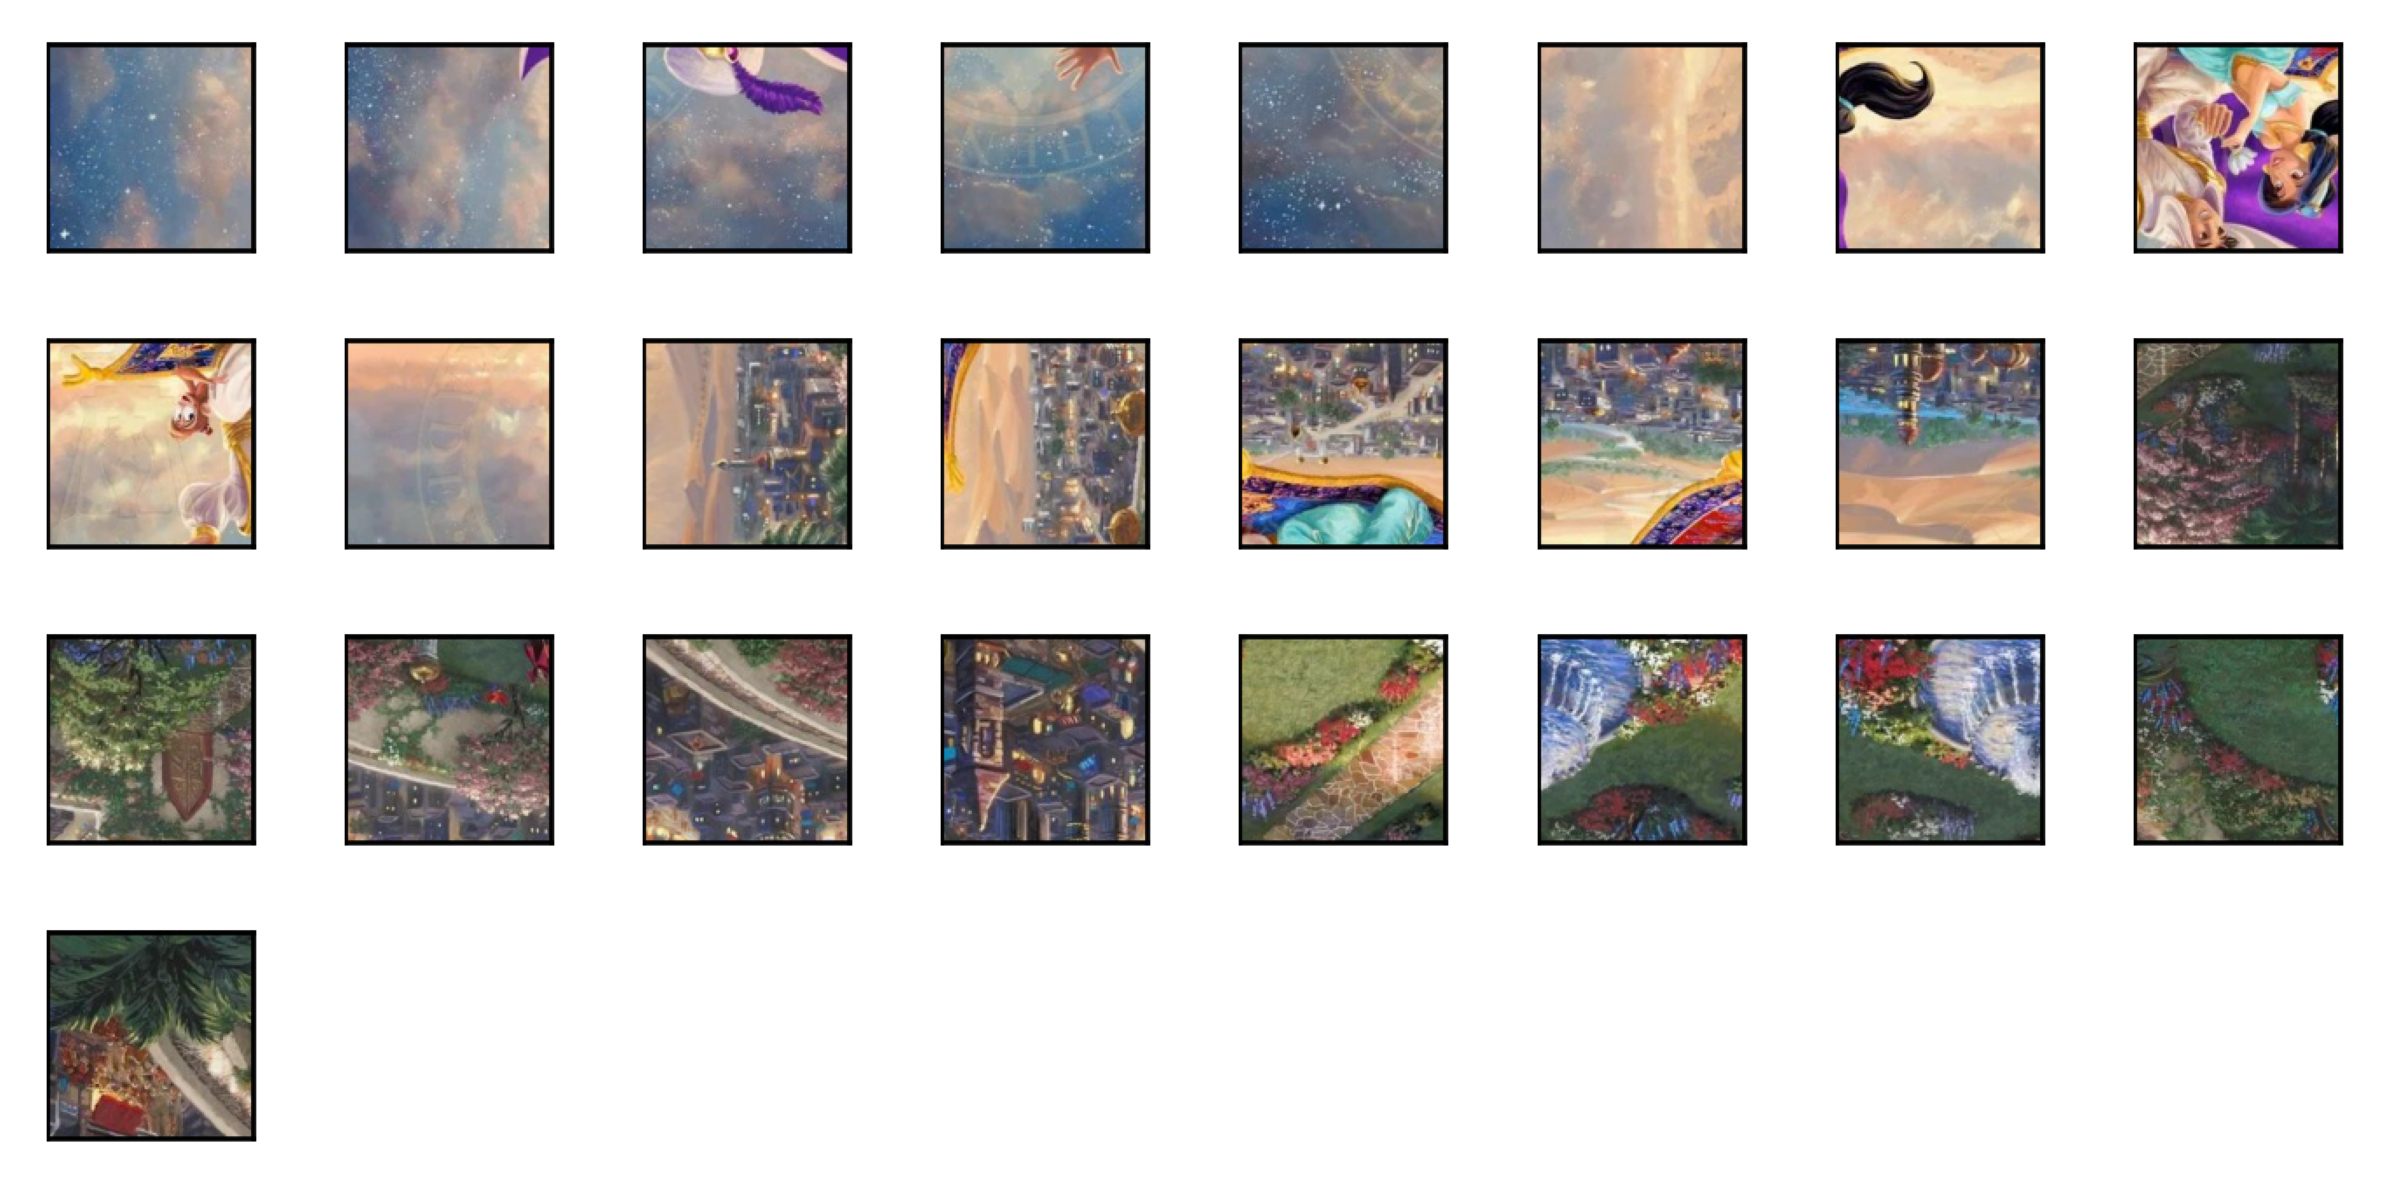

In [ ]:
groups, fragments, fragment_idx_to_group_idx = merge_where_obvious(clasic_score_one_image_passing, no_mean_score, 0.0001, 0.015, sorted_sides_comparisons, fragment_idx_to_group_idx, fragments, groups)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)


Merged group 10 and 6 with total score: 0.00032478864886797965 using: Sides Comp: Score=0.0017165385652333498 Buddy_Score:None Fragment_idx1=10, Side_idx1=3; fragment_idx2=6, side_idx2=3
Merged group 1 and 0 with total score: 0.0004115729534532875 using: Sides Comp: Score=0.00048248007078655064 Buddy_Score:None Fragment_idx1=1, Side_idx1=1; fragment_idx2=0, side_idx2=0
Merged group 4 and 0 with total score: 0.0005295334849506617 using: Sides Comp: Score=0.0005585781764239073 Buddy_Score:None Fragment_idx1=5, Side_idx1=2; fragment_idx2=0, side_idx2=1
Merged group 3 and 4 with total score: 0.6944478154182434 using: Sides Comp: Score=0.24304695427417755 Buddy_Score:637.409488583934 Fragment_idx1=5, Side_idx1=3; fragment_idx2=7, side_idx2=1
Merged group 18 and 17 with total score: 0.0006262317765504122 using: Sides Comp: Score=0.0011986015597358346 Buddy_Score:None Fragment_idx1=22, Side_idx1=3; fragment_idx2=21, side_idx2=1
Merged group 17 and 13 with total score: 0.0006262317765504122 us

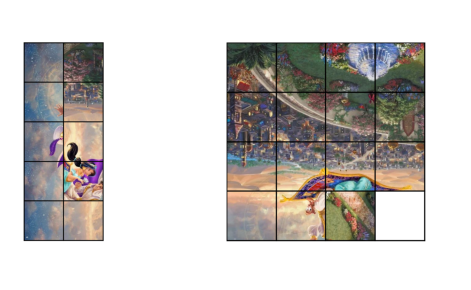

In [ ]:
groups, fragments, fragment_idx_to_group_idx = solve_groups_safe(groups, fragments, fragment_idx_to_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)



In [ ]:
gt_comparisons = read_valid_comparisons(solution_path)



comparisons = []

for g in groups:
    n = len(g.grid)
    m = len(g.grid[0])

    for i in range(n):
        for j in range(m):
            fr1_idx = g.grid[i][j]
            if fr1_idx is not None:
                if j + 1 < m:
                    side1_idx = find_side_idx_of_orientation(fragments[fr1_idx].rotation, 1)
                    fr2_idx = g.grid[i][j + 1]
                    if fr2_idx is not None:
                        side2_idx = find_side_idx_of_orientation(fragments[fr2_idx].rotation,3)
                        comparisons.append((fr1_idx, fr2_idx, side1_idx, side2_idx))

                if i + 1 < n:
                    side1_idx = find_side_idx_of_orientation(fragments[fr1_idx].rotation, 2)
                    fr2_idx = g.grid[i + 1][j]
                    if fr2_idx is not None:
                        side2_idx = find_side_idx_of_orientation(fragments[fr2_idx].rotation, 0)
                        comparisons.append((fr1_idx, fr2_idx, side1_idx, side2_idx))

correct = 0
nr_of_comp = int((2 * 4 + 3 * ((global_values.COL_NR - 2) * 2 + (global_values.ROW_NR - 2)* 2) + 4 * ((global_values.COL_NR -2) * (global_values.COL_NR-2)))/2)
for s_comp in comparisons:
    for gt_comp in gt_comparisons:
        if s_comp == gt_comp:
            correct+=1
        if s_comp[0] == gt_comp[1] and s_comp[1] == gt_comp[0] and s_comp[2] == gt_comp[3] and s_comp[3] == gt_comp[2]:
            correct+=1

accuracy = (correct/nr_of_comp) * 100
print(f"Accuracy of algorithm: {accuracy}%")

Accuracy of algorithm: 67.5%


In [ ]:
# introducere problema imagini input output

# care e algolritmul (greedy)
# functia de potrivire
# siameza

# cum merge pe low level, simaza pe diferiti nr pixeli
# timp

# 9 iunie licenta
